In [5]:
import os
import tarfile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import geopandas as gpd
import pygrib
from glob import glob

In [6]:
DIR_data = 'C:/Users/sverrirhd/vedurgogn/'
DIR_curr = 'C:/Users/sverrirhd/Google Drive/Skóli/DTU/Thesis/Programming/Example code/Jonas example of rain data'

In [7]:


############# Functions ############


def list_of_parameters(open_grib_file):
    ''' Takes a grib file that has been opened with pygrib's "open" method,
        returns a list of parameter that are available inside the file. '''
    # get a list of parameters in the file
    parameter_list = open_grib_file.read()
    return(parameter_list)


def read_parameter_info(parameter_list, param_number):
    ''' Takes a number for the parameter of interest, 
        returns various information incl. gridded values '''
    parameter_list[param_number].dataDate
    parameter_list[param_number].parameterName
    parameter_list[param_number].indicatorOfTypeOfLevel
    parameter_list[param_number].typeOfLevel
    parameter_list[param_number].latitudes
    parameter_list[param_number].longitudes
    parameter_list[param_number].values
    
    parameter_list[param_number].Ni
    parameter_list[param_number].Nj
    
    
    lats = parameter_list[param_number].latitudes.reshape(parameter_list[param_number].Nj, parameter_list[param_number].Ni)
    lons = parameter_list[param_number].longitudes.reshape(parameter_list[param_number].Nj, parameter_list[param_number].Ni)
    grid_values = parameter_list[param_number].values.reshape(parameter_list[param_number].Nj, parameter_list[param_number].Ni)
    
    
    param_output = {"date": parameter_list[param_number].dataDate,
                    "grib_number": parameter_list[param_number].parameterName,
                    "indicator_type": parameter_list[param_number].indicatorOfTypeOfLevel,
                    "type_of_level": parameter_list[param_number].indicatorOfTypeOfLevel,
                    "lats": lats,
                    "lons": lons,
                    "values": grid_values}
        
    return(param_output)


def remove_values_below(surface_field, threshold):
    surface_field[surface_field < threshold] = np.nan
    return(surface_field)

def nwp_plot(rain_array, lons, lats, bg_map_file, plot_title):
    ''' Function that plots gridded NWP data'''
    bg_map = gpd.read_file(bg_map_file)
    
    # create custom color map
    #cmap = colors.ListedColormap(["#85E3E4", '#42D8D8', '#42AFD8', '#4282D8', "#FFE600", '#FFAF00', '#FF5050', '#FF1A1A', "#BD0000", "#8C0000"])
    #boundaries = [0, .5, 1, 2, 3, 4, 5, 7.5, 10, 15, 20]
    #norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
    
    bg_map.plot(facecolor="lightgrey")
    plt.pcolor(lons, lats, rain_array, shading = "auto", alpha=0.8)#, cmap=cmap, norm=norm)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    #cbar.ax.set_ylabel('Rainfall intensity [mm/h]', rotation=90)
    #plt.xlim(7,15) # longitudes for Denmark (for a zoomed plot)
    #plt.ylim(54.5,58) # lattitudes for Denmark (for a zoomed plot)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(plot_title)



In [8]:
# print(test_file)
pygrib_file = pygrib.open(test_file)
pygrib_file.read()

NameError: name 'test_file' is not defined

In [9]:
# set working directory and locate an example file

# test_file = f'{DIR_data}harmonie/202001/harmonie_2020010100.39'
for test_file in glob(f'{DIR_data}harmonie/202001/harmonie_2020010100*'):
    # use pygrib to read GRIB file into memory
    pygrib_file = pygrib.open(test_file)

    # get a list of parameters that are available in the file (you only have one parameter: total precipitation)
    # the unit of "kg*m^(-2)" is equivalent to "mm"
    nwp_parameters = list_of_parameters(pygrib_file)
    print(nwp_parameters)
    break

for test_file in glob(f'{DIR_data}harmonie/201601/*'):
    
    # use pygrib to read GRIB file into memory
    pygrib_file = pygrib.open(test_file)

    # get a list of parameters that are available in the file (you only have one parameter: total precipitation)
    # the unit of "kg*m^(-2)" is equivalent to "mm"
    nwp_parameters = list_of_parameters(pygrib_file)
    print(nwp_parameters)
    # break

[1:TP Total precipitation kg m**-2:unknown (accum):lambert:heightAboveGround:level 0:fcst time 0 hrs (accum):from 202001010000]
[1:TP Total precipitation kg m**-2:unknown (accum):lambert:heightAboveGround:level 0:fcst time 0 hrs (accum):from 201601010000]
[1:TP Total precipitation kg m**-2:unknown (accum):lambert:heightAboveGround:level 0:fcst time 0-1 hrs (accum):from 201601010000]
[1:TP Total precipitation kg m**-2:unknown (accum):lambert:heightAboveGround:level 0:fcst time 0-2 hrs (accum):from 201601010000]
[1:TP Total precipitation kg m**-2:unknown (accum):lambert:heightAboveGround:level 0:fcst time 0-3 hrs (accum):from 201601010000]
[1:TP Total precipitation kg m**-2:unknown (accum):lambert:heightAboveGround:level 0:fcst time 0-4 hrs (accum):from 201601010000]
[1:TP Total precipitation kg m**-2:unknown (accum):lambert:heightAboveGround:level 0:fcst time 0-5 hrs (accum):from 201601010000]
[1:TP Total precipitation kg m**-2:unknown (accum):lambert:heightAboveGround:level 0:fcst time

KeyboardInterrupt: 

C:\Users\SVERRI~1\AppData\Local\Temp/ipykernel_32692/2427614171.py:57: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(lons, lats, rain_array, shading = "auto", alpha=0.8)#, cmap=cmap, norm=norm)


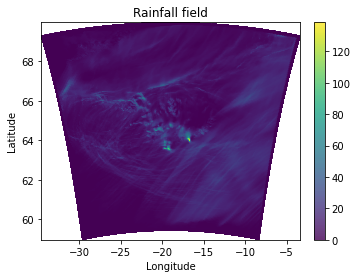

In [11]:

###############################################
###############################################
###############################################

# set working directory and locate an example file
test_file = f'{DIR_data}harmonie/202001/harmonie_2020010100.39'

# use pygrib to read GRIB file into memory
pygrib_file = pygrib.open(test_file)

# get a list of parameters that are available in the file (you only have one parameter: total precipitation)
# the unit of "kg*m^(-2)" is equivalent to "mm"
nwp_parameters = list_of_parameters(pygrib_file)

# extract the surface field of any available parameter, 
# total accumulated precipitation is number 6 (COMEPS), 58 (NEA), 0 (HirlamRA3)
extracted_field = read_parameter_info(nwp_parameters, 0)

# The longitudinal coordinates are given as ~350 degrees for Iceland, rather than the convention with ~-10 degrees
# Recalculate this to be the normal convention (only for later plotting purposes)
extracted_field['lons'] = extracted_field['lons'] - 360

# when plotting, define a threshold to remove values below the threshold from the figure
# can be useful if there are small data compression rounding errors in the raw grib data; if so, set threshold to something small like 0.2
# set to 0 to view all data
removal_threshold = 0
extracted_field["values"] = remove_values_below(extracted_field["values"], removal_threshold)

# file path to a shapefile with outline of Iceland (you need all 4 files [dbf, prj, shp, shx] in the same directory for this to work)
bg_map_file = f'{DIR_curr}/Iceland_map/geoBoundariesSimplified-3_0_0-ISL-ADM0.shp'

# make a plot!
nwp_plot(extracted_field['values'], extracted_field['lons'], extracted_field['lats'], bg_map_file, "Rainfall field")

plt.show()


In [ ]:
extracted_field['values'].shape

(469, 489)